### UOC - Universitat Oberta de Catalunya
* Tipología y ciclo de vida de los datos - Practica 1 - Web Scraping
* Master en Data Science
* Alumna: Gisele Guadalupe Almeida dos Santos Maia

In [1]:
# Se hace la importación de las librerías que vamos a utilizar en el web scarping
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### Captura de la tabla con los datos de 2016 

In [2]:
# Añadimos la página web para la captura de los datos y miramos se hay conexión
req = requests.get('https://fbref.com/en/comps/24/1495/stats/2016-Serie-A-Stats')
if req.status_code == 200:
    print('Se conecta!')
    content = req.content

Se conecta!


In [3]:
# Se hace utilización del BeautifulSoup indicando la tabla que se quiere recoger
soup = BeautifulSoup(content, 'html.parser')
stats_html = soup.find(string=re.compile('id="div_stats_player"'))
stats_soup = BeautifulSoup(stats_html, "html.parser")
table_str = str(stats_soup)
# deja los datos cómo dataframe
df = pd.read_html(table_str)[0]
df.columns = df.columns.droplevel(0)
#cómo vamos añadir otros años, aquí ya se hace referencia al que hemos recogido
df['Year'] = 2016

#### Captura de la tabla con los datos de 2017 

In [4]:
req = requests.get('https://fbref.com/en/comps/24/1559/stats/2017-Serie-A-Stats')
if req.status_code == 200:
    print('Se conecta!')
    content = req.content

Se conecta!


In [5]:
soup = BeautifulSoup(content, 'html.parser')
stats_html = soup.find(string=re.compile('id="div_stats_player"'))
stats_soup = BeautifulSoup(stats_html, "html.parser")
table_str = str(stats_soup)
df1 = pd.read_html(table_str)[0]
df1.columns = df1.columns.droplevel(0)
df1['Year'] = 2017

#### Captura de la tabla con los datos de 2018

In [6]:
req = requests.get('https://fbref.com/en/comps/24/1760/stats/2018-Serie-A-Stats')
if req.status_code == 200:
    print('Se conecta!')
    content = req.content

Se conecta!


In [7]:
soup = BeautifulSoup(content, 'html.parser')
stats_html = soup.find(string=re.compile('id="div_stats_player"'))
stats_soup = BeautifulSoup(stats_html, "html.parser")
table_str = str(stats_soup)
df2 = pd.read_html(table_str)[0]
df2.columns = df2.columns.droplevel(0)
df2['Year'] = 2018

#### Captura de la tabla con los datos de 2019

In [8]:
req = requests.get('https://fbref.com/en/comps/24/stats/Serie-A-Stats')
if req.status_code == 200:
    print('Se conecta!')
    content = req.content

Se conecta!


In [9]:
soup = BeautifulSoup(content, 'html.parser')
stats_html = soup.find(string=re.compile('id="div_stats_player"'))
stats_soup = BeautifulSoup(stats_html, "html.parser")
table_str = str(stats_soup)
df3 = pd.read_html(table_str)[0]
df3.columns = df3.columns.droplevel(0)
df3['Year'] = 2019

In [10]:
# se hace la unión de todas las tablas recogidas de los 4 anõs
df_fin = df.append(df1).append(df2).append(df3)

In [11]:
# se mira las 5 primeras lineas del dataframe
df_fin.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,Apps,Starts,Min,...,SoT,Fls,CrdY,CrdR,Gls,G+A,G-PK,G+A-PK,SoT,Year
0,1,Renato,br BRA,MF,Santos,36,1979,38,38,3368,...,7,28,2,0,0.05,0.13,0.05,0.13,0.19,2016
1,2,Henrique,br BRA,DF,Fluminense,29,1986,37,37,3330,...,7,29,5,0,0.00,0.00,0.00,0.00,0.19,2016
2,3,Wilson,br BRA,GK,Coritiba,32,1984,37,37,3330,...,0,1,1,0,0.00,0.00,0.00,0.00,0.00,2016
3,4,Ernando,br BRA,DF,Internacional,27,1988,37,37,3319,...,7,24,4,0,0.05,0.16,0.05,0.16,0.19,2016
4,5,Vanderlei,br BRA,GK,Santos,32,1984,37,37,3318,...,0,1,2,1,0.00,0.00,0.00,0.00,0.00,2016


In [12]:
# se borra las lineas que contienen 'Rk' que es el título de las tablas de los anõs de 2017 hasta 2019
drop_indexes = df_fin[df_fin['Rk'] == 'Rk'].index 
df_fin.drop(drop_indexes, inplace=True) 

In [13]:
# mira los tipos de los datos
df_fin.dtypes

Rk        object
Player    object
Nation    object
Pos       object
Squad     object
Age       object
Born      object
Apps      object
Starts    object
Min       object
Mn/Ap     object
Gls       object
Ast       object
PK        object
PKatt     object
SoT       object
Fls       object
CrdY      object
CrdR      object
Gls       object
G+A       object
G-PK      object
G+A-PK    object
SoT       object
Year       int64
dtype: object

In [14]:
# hace la transformación de datos que están cómo object para numerico
df_fin['Rk'] = df_fin['Rk'].apply(pd.to_numeric)
df_fin['Age'] = df_fin['Age'].apply(pd.to_numeric)
df_fin['Born'] = df_fin['Born'].apply(pd.to_numeric)
df_fin['Apps'] = df_fin['Apps'].apply(pd.to_numeric)
df_fin['Starts'] = df_fin['Starts'].apply(pd.to_numeric)
df_fin['Min'] = df_fin['Min'].apply(pd.to_numeric)
df_fin['Mn/Ap'] = df_fin['Mn/Ap'].apply(pd.to_numeric)
df_fin['Gls'] = df_fin['Gls'].apply(pd.to_numeric)
df_fin['Ast'] = df_fin['Ast'].apply(pd.to_numeric)
df_fin['PK'] = df_fin['PK'].apply(pd.to_numeric)

In [15]:
df_fin['PKatt'] = df_fin['PKatt'].apply(pd.to_numeric)
df_fin['SoT'] = df_fin['SoT'].apply(pd.to_numeric)
df_fin['Fls'] = df_fin['Fls'].apply(pd.to_numeric)
df_fin['CrdY'] = df_fin['CrdY'].apply(pd.to_numeric)
df_fin['CrdR'] = df_fin['CrdR'].apply(pd.to_numeric)
df_fin['Gls'] = df_fin['Gls'].apply(pd.to_numeric)
df_fin['G+A'] = df_fin['G+A'].apply(pd.to_numeric)
df_fin['G-PK'] = df_fin['G-PK'].apply(pd.to_numeric)
df_fin['G+A-PK'] = df_fin['G+A-PK'].apply(pd.to_numeric)
df_fin['SoT'] = df_fin['SoT'].apply(pd.to_numeric)

In [16]:
# cambia los nombres de las columnas que hacen referencia a 90 minutos de la partida
df_fin.columns.values[19] = 'Gls_90min'
df_fin.columns.values[20] = 'G+A_90min'
df_fin.columns.values[21] = 'G-PK_90min'
df_fin.columns.values[22] = 'G+A-PK_90min'
df_fin.columns.values[23] = 'SoT_90min'

In [17]:
df_fin.dtypes

Rk                int64
Player           object
Nation           object
Pos              object
Squad            object
Age             float64
Born            float64
Apps              int64
Starts            int64
Min             float64
Mn/Ap             int64
Gls             float64
Ast               int64
PK                int64
PKatt             int64
SoT             float64
Fls               int64
CrdY              int64
CrdR              int64
Gls_90min       float64
G+A_90min       float64
G-PK_90min      float64
G+A-PK_90min    float64
SoT_90min       float64
Year              int64
dtype: object

In [18]:
# Importación de más librarías para visualización de algunos datos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="Year",y="Gls",kind='box',hue='Nation',data=df_fin)

In [19]:
# Cómo hay otras nacionalidades en el dataframe, se queda solamente con los jugadores brasileños
dfbra = df_fin[df_fin['Nation'] == "br BRA"]

In [20]:
dfbra.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,Apps,Starts,Min,...,SoT,Fls,CrdY,CrdR,Gls_90min,G+A_90min,G-PK_90min,G+A-PK_90min,SoT_90min,Year
0,1,Renato,br BRA,MF,Santos,36.0,1979.0,38,38,3368.0,...,7.0,28,2,0,0.05,0.13,0.05,0.13,0.19,2016
1,2,Henrique,br BRA,DF,Fluminense,29.0,1986.0,37,37,3330.0,...,7.0,29,5,0,0.00,0.00,0.00,0.00,0.19,2016
2,3,Wilson,br BRA,GK,Coritiba,32.0,1984.0,37,37,3330.0,...,0.0,1,1,0,0.00,0.00,0.00,0.00,0.00,2016
3,4,Ernando,br BRA,DF,Internacional,27.0,1988.0,37,37,3319.0,...,7.0,24,4,0,0.05,0.16,0.05,0.16,0.19,2016
4,5,Vanderlei,br BRA,GK,Santos,32.0,1984.0,37,37,3318.0,...,0.0,1,2,1,0.00,0.00,0.00,0.00,0.00,2016


In [21]:
# Se mira el total de lineas y columnas que contiene el dataframe
dfbra.shape

(2616, 25)

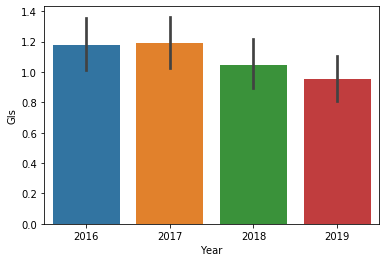

In [22]:
# Se mira la media de los goles por año
sns.barplot(x="Year", y="Gls", data=dfbra)

In [23]:
# Se mira la media de goles por posición del jugador en los 4 años
dfbra.groupby('Pos', as_index = False ).agg( { "Gls" : "mean" } )

,Pos,Gls
0,DF,0.538259
1,"DF,FW",0.000000
2,"DF,MF",0.555556
3,"DF,MF,FW",1.000000
4,FW,2.144465
5,"FW,DF,MF",0.000000
6,"FW,MF",2.444444
7,GK,0.014851
8,"GK,DF",0.000000
9,MF,1.081019


In [24]:
# Se mira el total de goles por la posición (en los 4 años)
dfbra.groupby('Pos', as_index = False ).agg( { "Gls" : "count" } )

,Pos,Gls
0,DF,758
1,"DF,FW",1
2,"DF,MF",18
3,"DF,MF,FW",1
4,FW,533
5,"FW,DF,MF",1
6,"FW,MF",27
7,GK,202
8,"GK,DF",2
9,MF,864


In [25]:
# Se queda con un dataframe de posición de delantero solamente
dfbra_delantero = dfbra[dfbra['Pos'] == 'FW']

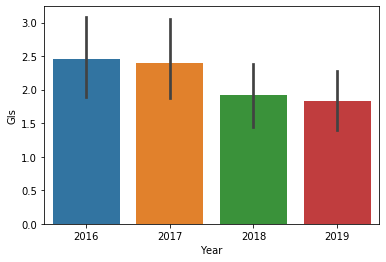

In [26]:
# Aquí se mira la media de goles que los delanteros hiciran en los años. Hemos tenido una caeda de 2.5 para 1.8 dentre 2016 y 2019
sns.barplot(x="Year", y="Gls", data=dfbra_delantero)

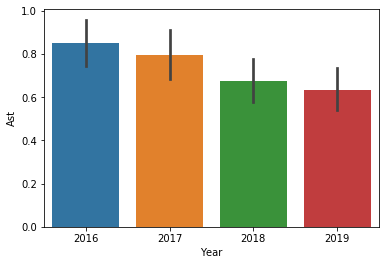

In [27]:
# en el valor de la media de ayudas (actuación) en los años también hay una caeda.
sns.barplot(x="Year", y="Ast", data=dfbra)

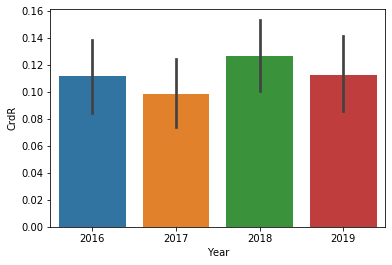

In [28]:
# ya la cantidad media de tarjetas rojas hay ocilación entre los años
sns.barplot(x="Year", y="CrdR", data=dfbra)

In [29]:
# Aquí se guarda el dataframe en formato csv y con el nombra: players_brasil_seriea_16_19
dfbra.to_csv('players_brasil_seriea_16_19.csv', index = False)